### Import your dependencies

In [1]:
from twitter import *
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import advertools as adv
import sys, os
from collections import Counter
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
import itertools
from config import access_token, access_toke_secret, api_key, api_secret

### OAuth dance

In [2]:
t = Twitter(
    auth=OAuth(access_token, access_toke_secret, api_key, api_secret))
print(t)

### "where on earth identifier" or WOEID

In [3]:
# See https://dev.twitter.com/docs/api/1.1/get/trends/place
#which is a legacy identifier created by Yahoo and has been deprecated. Twitter API v1.1 still uses the numeric value to identify town and country trend locations.

WORLD_WOE_ID = 1
MX_WOE_ID = 23424900

world_trends = t.trends.place(_id=WORLD_WOE_ID)
mx_trends = t.trends.place(_id=MX_WOE_ID)

### Convert our World Trending Topics into JSON format

In [4]:
#JSON conversion
import json
world_json_trends=json.dumps(world_trends, indent=1)
print(world_json_trends)

[
 {
  "trends": [
   {
    "name": "Bob Saget",
    "url": "http://twitter.com/search?q=%22Bob+Saget%22",
    "promoted_content": null,
    "query": "%22Bob+Saget%22",
    "tweet_volume": 457985
   },
   {
    "name": "nate",
    "url": "http://twitter.com/search?q=nate",
    "promoted_content": null,
    "query": "nate",
    "tweet_volume": 126439
   },
   {
    "name": "#Euphoria",
    "url": "http://twitter.com/search?q=%23Euphoria",
    "promoted_content": null,
    "query": "%23Euphoria",
    "tweet_volume": 217678
   },
   {
    "name": "cassie",
    "url": "http://twitter.com/search?q=cassie",
    "promoted_content": null,
    "query": "cassie",
    "tweet_volume": 76287
   },
   {
    "name": "Klay",
    "url": "http://twitter.com/search?q=Klay",
    "promoted_content": null,
    "query": "Klay",
    "tweet_volume": 441883
   },
   {
    "name": "Chargers",
    "url": "http://twitter.com/search?q=Chargers",
    "promoted_content": null,
    "query": "Chargers",
    "tweet_volu

### List comprenhension to iterate over the JSON

In [5]:
#itearate over the json to get the trend list and the tweet volume
world_trends_list = [trend['name'] 
                        for trend in world_trends[0]['trends']]

world_trending_volume =[trend['tweet_volume'] 
                        for trend in world_trends[0]['trends']]

print(world_trends_list, world_trending_volume)

['Bob Saget', 'nate', '#Euphoria', 'cassie', 'Klay', 'Chargers', 'lexi', 'Full House', 'Raiders', 'maddy', 'Fezco', 'jules', 'Danny Tanner', '成人の日', 'フルハウス', 'Herbert', 'Ja Morant', 'Barinas', '#GoldenGlobes', '#LACvsLV', '#RaiderNation', '49ers', 'Staley', 'Rams', 'HBO Max', 'McKay', 'zendaya', 'Curry', 'Renfrow', 'Niners', 'jade picon', 'Grizzlies', '#BareShelvesBiden', 'Carr', 'Porsha', '石原さとみ', 'Álvaro', 'Warriors', '安心沢さん', 'Rest In Peace', 'SSR安心沢', "America's Funniest Home Videos", 'Maddie', 'ボブ・サゲットさん', 'The Aristocrats', '進出確定', 'dominic fike', '史上最大規模の謎解き全国大会', 'Stafford', 'Maxx Crosby'] [457985, 126439, 217678, 76287, 441883, 132664, 43248, 153661, 163214, 34150, 35662, 51782, 47446, 83079, 24945, 22940, 39845, 338566, 29332, 18059, 30538, 175553, 11477, 108958, 24846, 15216, 193536, 62572, 10978, 42920, 15986, None, 75629, 17249, 10446, 13043, 38194, 241578, None, 87139, 23584, 15534, None, None, None, None, None, None, 39225, None]


### Create a dictionary

In [6]:
#The following step is to create a dictionary, so we can create a DataFrame.
world_data ={"Trend_name":world_trends_list,"Tweet_volume":world_trending_volume}
#print(data)

### Create a DataFrame out of the previous dictionary

In [7]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
world_df =pd.DataFrame(world_data)
world_df.head(6)

,Trend_name,Tweet_volume
0,Bob Saget,457985.0
1,nate,126439.0
2,#Euphoria,217678.0
3,cassie,76287.0
4,Klay,441883.0
5,Chargers,132664.0


### Convert our MX Trending Topics into JSON format

In [8]:
#JSON conversion
mx_json_trends=json.dumps(mx_trends, indent=1)
print(world_json_trends)

[
 {
  "trends": [
   {
    "name": "Bob Saget",
    "url": "http://twitter.com/search?q=%22Bob+Saget%22",
    "promoted_content": null,
    "query": "%22Bob+Saget%22",
    "tweet_volume": 457985
   },
   {
    "name": "nate",
    "url": "http://twitter.com/search?q=nate",
    "promoted_content": null,
    "query": "nate",
    "tweet_volume": 126439
   },
   {
    "name": "#Euphoria",
    "url": "http://twitter.com/search?q=%23Euphoria",
    "promoted_content": null,
    "query": "%23Euphoria",
    "tweet_volume": 217678
   },
   {
    "name": "cassie",
    "url": "http://twitter.com/search?q=cassie",
    "promoted_content": null,
    "query": "cassie",
    "tweet_volume": 76287
   },
   {
    "name": "Klay",
    "url": "http://twitter.com/search?q=Klay",
    "promoted_content": null,
    "query": "Klay",
    "tweet_volume": 441883
   },
   {
    "name": "Chargers",
    "url": "http://twitter.com/search?q=Chargers",
    "promoted_content": null,
    "query": "Chargers",
    "tweet_volu

### List comprenhension to iterate over the JSON

In [9]:
#itearate over the json to get the trend list and the tweet volume
mx_trends_list = [trend['name'] 
                        for trend in mx_trends[0]['trends']]

mx_trending_volume =[trend['tweet_volume'] 
                        for trend in mx_trends[0]['trends']]

print(mx_trends_list, mx_trending_volume)

['#Euphoria', '#LuchaDeEliminación', 'nate', '#GoldenGlobes', 'Bob Saget', 'lexi', 'cassie', 'Chargers', 'Chargers', 'Full House', 'Fezco', '#BoltUp', '#TeBuscamosWendy', 'Zudikey', 'jules', 'Herbert', 'Mazatlán', 'Nataly', 'Danny Tanner', 'LAST KICK DANI', 'CONOCE A LA BAUTISTER', '49ers', 'Staley', 'maddy', 'Klay', 'Ja Morant', 'Globo de Oro', 'Macky', 'Josh', 'Will Smith', 'leaño', 'Daniel Ortega', 'tom hardy', 'SAAK EN REBELDE', 'Tyler', 'zendaya', 'Jacob Elordi', 'Rams', 'Rápido y Furioso', 'Barinas', 'Melón', 'Lalo Torres', 'Leañismo', 'HBO Max', 'Nicaragua', 'Ted Mosby', 'Steelers', 'Jimmy G', 'Maddie', 'Conductor'] [218466, None, 126439, 29456, 457985, 43095, 76287, 132316, 132316, 153661, 35662, 12758, None, None, 51782, 22940, None, None, 47446, None, None, 175553, 11505, 34246, 441883, 39845, None, None, 167283, None, None, 19717, None, None, 54411, 193536, None, 108958, 16798, 338566, 67534, None, None, 24846, 32211, None, 206152, 26662, None, 11921]


In [10]:
#The following step is to create a dictionary, so we can create a DataFrame.
mx_data ={"Trend_name":mx_trends_list,"Tweet_volume":mx_trending_volume}
#print(data)

In [11]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
mx_df=pd.DataFrame(mx_data)
mx_df.head(5)

,Trend_name,Tweet_volume
0,#Euphoria,218466.0
1,#LuchaDeEliminación,NaN
2,nate,126439.0
3,#GoldenGlobes,29456.0
4,Bob Saget,457985.0


### Get the statutes/tweets

In [12]:
q = '#Bitcoin' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets
search_results = t.search.tweets(q=q, count=count)

#print(search_results)

#access to statuses
statuses = search_results['statuses']

print(search_results)

{'statuses': [{'created_at': 'Mon Jan 10 04:31:35 +0000 2022', 'id': 1480396879401787397, 'id_str': '1480396879401787397', 'text': 'Fenerbahçeli futbolcu Valencia: Kaybetme lüksümüz yok - https://t.co/Mr5GQLMmNi - #sondakika #gundem #Bitcoin https://t.co/DCQIHXaofJ', 'truncated': False, 'entities': {'hashtags': [{'text': 'sondakika', 'indices': [82, 92]}, {'text': 'gundem', 'indices': [93, 100]}, {'text': 'Bitcoin', 'indices': [101, 109]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Mr5GQLMmNi', 'expanded_url': 'https://haberabi.com/spor/fenerbahceli-futbolcu-valencia-kaybetme-luksumuz-yok/', 'display_url': 'haberabi.com/spor/fenerbahc…', 'indices': [56, 79]}], 'media': [{'id': 1480396877740789760, 'id_str': '1480396877740789760', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'url': 'https://t.co/DCQIHXaofJ', 'display_url': 'pic.twitter.com/DCQIHXaofJ', 

In [13]:
print(search_results)

{'statuses': [{'created_at': 'Mon Jan 10 04:31:35 +0000 2022', 'id': 1480396879401787397, 'id_str': '1480396879401787397', 'text': 'Fenerbahçeli futbolcu Valencia: Kaybetme lüksümüz yok - https://t.co/Mr5GQLMmNi - #sondakika #gundem #Bitcoin https://t.co/DCQIHXaofJ', 'truncated': False, 'entities': {'hashtags': [{'text': 'sondakika', 'indices': [82, 92]}, {'text': 'gundem', 'indices': [93, 100]}, {'text': 'Bitcoin', 'indices': [101, 109]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Mr5GQLMmNi', 'expanded_url': 'https://haberabi.com/spor/fenerbahceli-futbolcu-valencia-kaybetme-luksumuz-yok/', 'display_url': 'haberabi.com/spor/fenerbahc…', 'indices': [56, 79]}], 'media': [{'id': 1480396877740789760, 'id_str': '1480396877740789760', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'url': 'https://t.co/DCQIHXaofJ', 'display_url': 'pic.twitter.com/DCQIHXaofJ', 

### Get the latest tweets

In [14]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break### Get the statutes/tweets
    
    #print(next_results) #para ver el último nextresult
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23Bitcoin&count=100&include_entities=1
    # you are creating a dictionary and by kv.split(=) you are creating key-value pairs
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    print(kwargs)
    
    search_results = t.search.tweets(**kwargs)
    statuses += search_results['statuses']
    print(statuses)

Length of statuses 69
{'max_id': '1480396659846569983', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
[{'created_at': 'Mon Jan 10 04:31:35 +0000 2022', 'id': 1480396879401787397, 'id_str': '1480396879401787397', 'text': 'Fenerbahçeli futbolcu Valencia: Kaybetme lüksümüz yok - https://t.co/Mr5GQLMmNi - #sondakika #gundem #Bitcoin https://t.co/DCQIHXaofJ', 'truncated': False, 'entities': {'hashtags': [{'text': 'sondakika', 'indices': [82, 92]}, {'text': 'gundem', 'indices': [93, 100]}, {'text': 'Bitcoin', 'indices': [101, 109]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Mr5GQLMmNi', 'expanded_url': 'https://haberabi.com/spor/fenerbahceli-futbolcu-valencia-kaybetme-luksumuz-yok/', 'display_url': 'haberabi.com/spor/fenerbahc…', 'indices': [56, 79]}], 'media': [{'id': 1480396877740789760, 'id_str': '1480396877740789760', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'media_url_https': 'https://pbs.twimg.com/media/

[{'created_at': 'Mon Jan 10 04:31:35 +0000 2022', 'id': 1480396879401787397, 'id_str': '1480396879401787397', 'text': 'Fenerbahçeli futbolcu Valencia: Kaybetme lüksümüz yok - https://t.co/Mr5GQLMmNi - #sondakika #gundem #Bitcoin https://t.co/DCQIHXaofJ', 'truncated': False, 'entities': {'hashtags': [{'text': 'sondakika', 'indices': [82, 92]}, {'text': 'gundem', 'indices': [93, 100]}, {'text': 'Bitcoin', 'indices': [101, 109]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Mr5GQLMmNi', 'expanded_url': 'https://haberabi.com/spor/fenerbahceli-futbolcu-valencia-kaybetme-luksumuz-yok/', 'display_url': 'haberabi.com/spor/fenerbahc…', 'indices': [56, 79]}], 'media': [{'id': 1480396877740789760, 'id_str': '1480396877740789760', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FIttHehWUAATB6g.jpg', 'url': 'https://t.co/DCQIHXaofJ', 'display_url': 'pic.twitter.com/DCQIHXaofJ', 'expanded_url

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Get all the status text, screen names, hastags and words

In [15]:
#get the statuses
status_text = [status['text'] 
                 for status in statuses]
#get the screen names
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
#get the hastags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_text 
              for w in t.split() ]

### Create a list that contains the word and its count up to the first ten elements

In [16]:
#from collections import Counter
for item in [status_text, screen_names, hashtags, words]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT @leonarbuke: Daha önce de yapmıştım ama beklediğim kadar katılım olmamıştı bende ödülü büyüttüm.Bir kişiye iPhone 13 128 GB veya ÜCRETİN…', 14), ('RT @foxycuddels: #bitcoin #cryptocurrency #ethereum #blockchain #btc #crypto #ripple #business #binance #trading #eth #bitcoinmining #coinb…', 9), ('RT @Pastore1314: #Bitcoin at 40K in 2021/2022 https://t.co/DU8L64gAGJ', 8), ('RT @JobPreference: #Hiring ?\nSign up now https://t.co/rMErDJMv4h\nFREE OF CHARGE. NO MIDDLEMEN\n#Robotics #AIEthics #MachineLearning #AI #Pyt…', 8), ('RT @TheMoonCarl: Reminder: Buy #Bitcoin and HODL.', 7), ('RT @saylor: Stay hungry. #Bitcoin', 5), ('RT @DocumentingBTC: Satoshi Nakamoto programmed the last #bitcoin to be mined in 2140, meaning they intentionally created something they th…', 5), ('RT @fort_swap: Hello Fortswap Community we hope all of us we are Fine, We have good news to inform you that our Pre-sale coming soon on 10t…', 5), ('RT @JobPreference: LOOKING FOR A JOB?\nSign up now https://t.co/rMErDJ

### Clean *stop words* from words

In [17]:
#import nltk
#from nltk.corpus import stopwords  
#from nltk.tokenize import word_tokenize

stopwords = (["A", "is", "me", "you", 'I', 'will', "on",":","to","+","be","1", "of", "in", "the", "for", "The", "at", "and", "La", "En", "http…", "??..", "https://t.co/", "Y", "y", "nos", "esta", "está", "o", "sus", "este", "por", "Se", "RT", "RT ", "a", "con", "El", "un", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

filterwords= [w for w in words if not w in stopwords]

In [18]:
for item in [screen_names, hashtags, filterwords]:
    c=Counter(item)
    print(c.most_common()[:10])
    print()

[('leonarbuke', 14), ('JobPreference', 12), ('DocumentingBTC', 10), ('TheMoonCarl', 10), ('foxycuddels', 9), ('Pastore1314', 8), ('saylor', 7), ('AirdropStario', 6), ('intocryptoverse', 6), ('Chain', 6)]

[('Bitcoin', 193), ('bitcoin', 67), ('BTC', 30), ('cryptocurrency', 21), ('crypto', 19), ('btc', 17), ('Crypto', 14), ('Robotics', 13), ('MachineLearning', 13), ('AI', 13)]

[('#Bitcoin', 177), ('#bitcoin', 63), ('this', 33), ('#BTC', 29), ('are', 21), ('that', 21), ('kişiye', 20), ('have', 20), ('they', 19), ('#crypto', 19)]



In [19]:
for item in [filterwords]:
    c = Counter(item)
    clean_filterwords=pd.DataFrame(c.most_common()[:10])
    clean_filterwords.columns=["Words","Count"]
clean_filterwords

,Words,Count
0,#Bitcoin,177
1,#bitcoin,63
2,this,33
3,#BTC,29
4,are,21
5,that,21
6,kişiye,20
7,have,20
8,they,19
9,#crypto,19


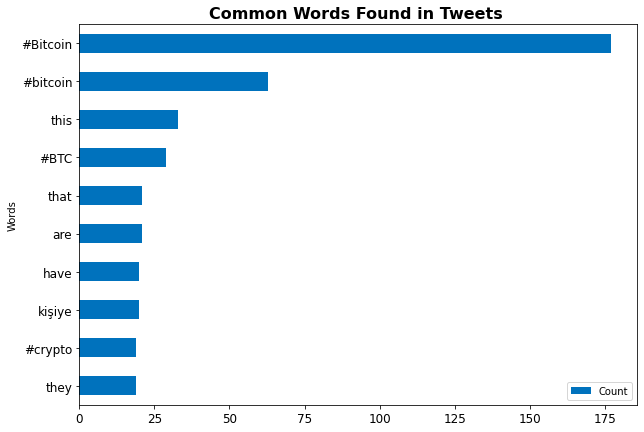

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_filterwords.sort_values(by='Count').plot.barh(x='Words',
                      y='Count',
                      ax=ax,
                      color="#0072BD")

ax.set_title("Common Words Found in Tweets ", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [21]:
for item in [screen_names]:
    c = Counter(item)
    clean_screennames=pd.DataFrame(c.most_common()[:10])
    clean_screennames.columns=["Screen Names","Count"]
clean_screennames

,Screen Names,Count
0,leonarbuke,14
1,JobPreference,12
2,DocumentingBTC,10
3,TheMoonCarl,10
4,foxycuddels,9
5,Pastore1314,8
6,saylor,7
7,AirdropStario,6
8,intocryptoverse,6
9,Chain,6


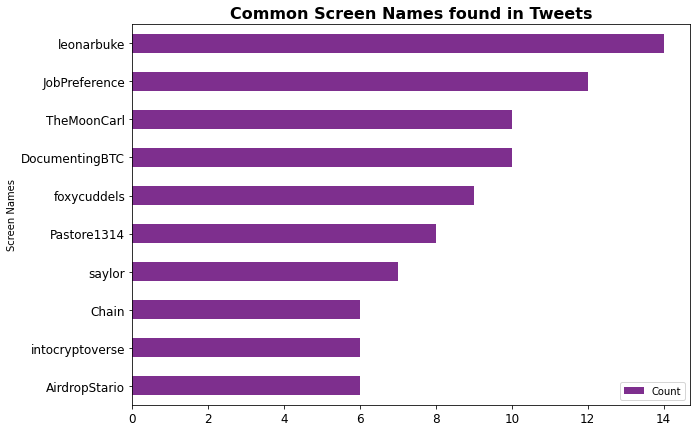

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_screennames.sort_values(by='Count').plot.barh(x='Screen Names',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Screen Names found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [23]:
for item in [hashtags]:
    c = Counter(item)
    clean_hastags=pd.DataFrame(c.most_common()[:10])
    clean_hastags.columns=["Hashtags","Count"]
clean_hastags

,Hashtags,Count
0,Bitcoin,193
1,bitcoin,67
2,BTC,30
3,cryptocurrency,21
4,crypto,19
5,btc,17
6,Crypto,14
7,Robotics,13
8,MachineLearning,13
9,AI,13


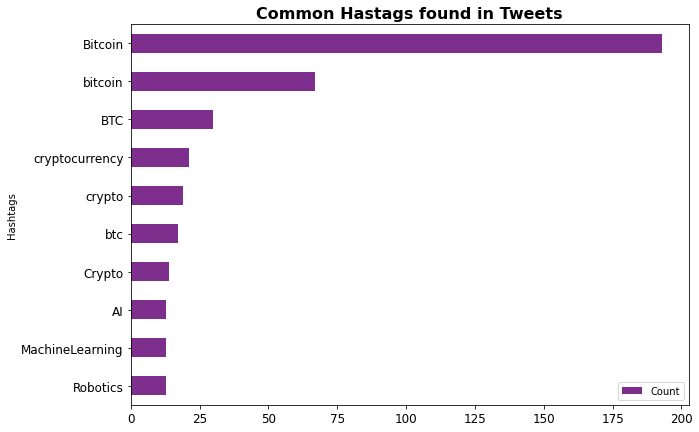

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_hastags.sort_values(by='Count').plot.barh(x='Hashtags',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Hastags found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

### Create a dataframe that shows the most retweeted statuses

In [25]:
#import itertools

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['retweeted_status']['created_at'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

retweets.sort(reverse=True)
pd3=pd.DataFrame(list(retweets for retweets,_ in itertools.groupby(retweets)))
pd3.columns=["Retweet Count", "Screen Name", "Tweet ID", "Created At", "Text"]
pd3.head(6)

,Retweet Count,Screen Name,Tweet ID,Created At,Text
0,28937,AirdropDet,1474371954471849984,Fri Dec 24 13:30:41 +0000 2021,RT @AirdropDet: 🔍 New #Airdrop: Kyrrex\n\n💲Rew...
1,12360,AirdropDet,1479143393972338688,Thu Jan 06 17:30:40 +0000 2022,RT @AirdropDet: 🔍 New #Airdrop: WeWay\n\n💲Rewa...
2,10249,Steam_Exchange,1480043664424456198,Sun Jan 09 05:08:02 +0000 2022,RT @Steam_Exchange: Our whitepaper https://t.c...
3,10245,Steam_Exchange,1480043664424456198,Sun Jan 09 05:08:02 +0000 2022,RT @Steam_Exchange: Our whitepaper https://t.c...
4,10181,nayibbukele,1402714926800674827,Wed Jun 09 19:51:14 +0000 2021,RT @nayibbukele: Our engineers just informed m...
5,7465,AirdropStario,1479803824571359236,Sat Jan 08 13:14:59 +0000 2022,RT @AirdropStario: 💧 Esca Crypto Airdrop 💧\n\n...


In [26]:
emoji_summary = adv.extract_emoji(pd3['Text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [27]:
emoji_summary["overview"]["num_emoji"]

183

In [28]:
emoji_list=emoji_summary["top_emoji"][:11]
emoji_list

[('🔸', 24),
 ('✅', 9),
 ('🔥', 9),
 ('👇', 9),
 ('🎁', 8),
 ('🚀', 6),
 ('🚨', 6),
 ('💞', 5),
 ('💧', 4),
 ('➕', 4),
 ('⭐', 4)]

In [29]:
emoji_df=pd.DataFrame(emoji_list)
emoji_df.rename(columns={0:'Emoji',1:'Count'},inplace=True)
emoji_df

,Emoji,Count
0,🔸,24
1,✅,9
2,🔥,9
3,👇,9
4,🎁,8
5,🚀,6
6,🚨,6
7,💞,5
8,💧,4
9,➕,4


There are 21255 words in the combination of all review.


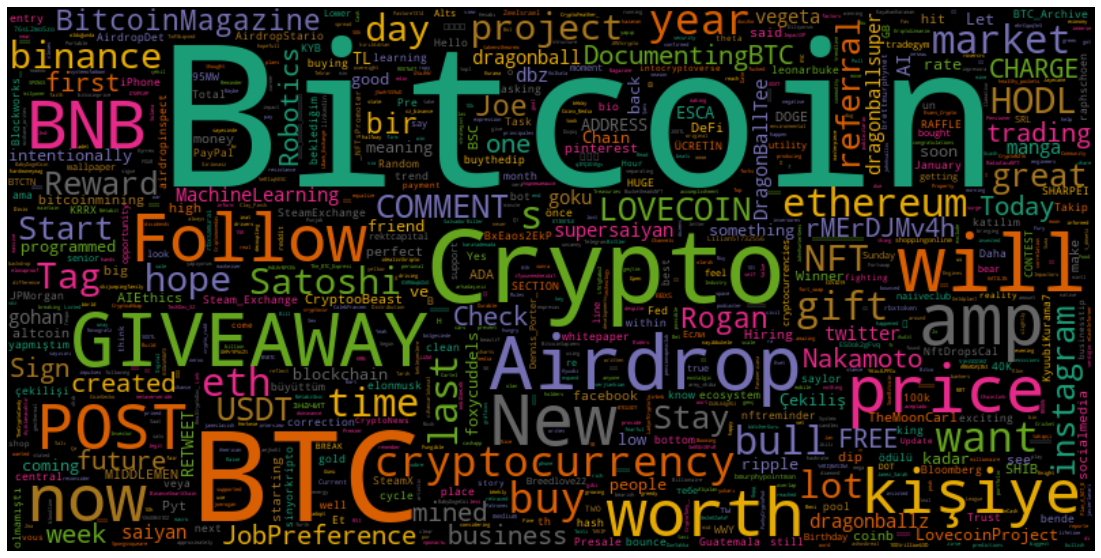

In [34]:
import os
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)


# Read the whole text.
text = " ".join(review for review in pd3.Text)

stopwords = set(STOPWORDS)

stopwords.update(["RT", "e", "RT ", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

print ("There are {} words in the combination of all review.".format(len(text)))


# Generate a word cloud image

wordcloud = WordCloud(colormap="Dark2", background_color="black", stopwords=stopwords, max_words=2000, collocations=False, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
import string# image.show()

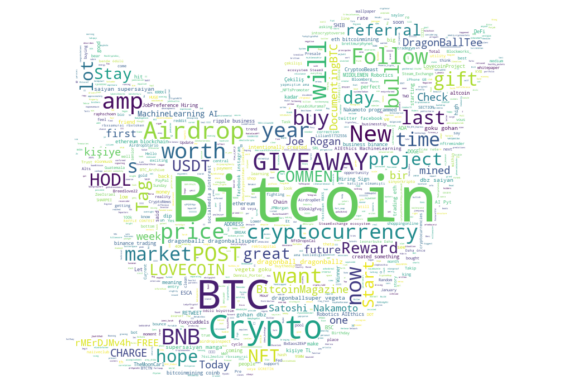

In [35]:
# Para este código, la imagen debe de tener un fondo blanco

# Create a word cloud image

twitter_mask = np.array(Image.open("/Users/humbertorodriguez/Documents/Mining_the_Social_Web/twitter.jpg"))

wc = WordCloud(background_color="white", max_words=4000, mask=twitter_mask,
               stopwords=stopwords, contour_width=2, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("/Users/humbertorodriguez/Documents/Mining_the_Social_Web/twitter1.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

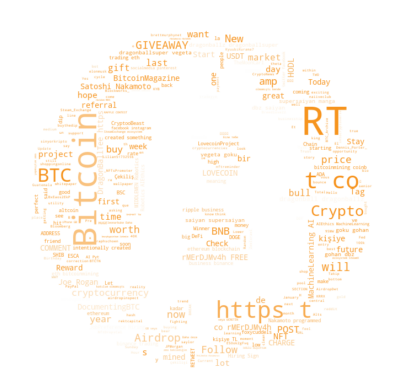

In [37]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text =  " ".join(review for review in pd3.Text)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask = np.array(Image.open(path.join(d, "bitcoin.jpg")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=10000, mask=mask,contour_width=0, contour_color='orange',
               stopwords=stopwords)

# generate word cloud
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

In [ ]:
def sum(*args):
    value = 0
    for n in args:
        value = value+n
    return value

In [ ]:
sum(2,5)